<p align="center">
Universidade Federal de Alagoas</br>

Instituto de Computação</br>

</p>

#Trabalho Prático AB2

Disciplina: Sistemas Distribuídos

Semestre letivo: 2017.1

Professor: André Lage Freitas

## Especificação

**Importante**. Leia atentamente essa seção pois só serão aceitos trabalhos que obedecerem as a especificações a seguir. 

Baseado(a) no exemplo a seguir de implementação do B-multicast em Julia, façam os exercícios descritos nesse documento.

In [ ]:
# Install libraries use in this work
using Pkg
Pkg.add("Distributed")
Pkg.add("Plots")
Pkg.add("StatsPlots")
Pkg.add("Statistics")

In [2]:
# Import libraries use in this work
using Distributed
using Plots
using StatsPlots
using Statistics

In [3]:
@everywhere function B_deliver(m)
    println(m)
end

### B_multicast

In [4]:
function B_multicast(workers,msg,func,sync)
    if sync
        for w in workers
            @sync @spawnat w func(msg)
        end
    else
        for w in workers
            @spawnat w func(msg)
        end
    end
end

B_multicast (generic function with 1 method)

### Exercício 1: Sincronismo (2,0 pontos)

Adicione 10 processos com o comando `addprocs` abaixo. 

_Atenção_: sua instalação local de Julia pode não conseguir adicionar 10 processos, use a [JuliaBox](https://juliabox.com).

In [5]:
addprocs(10)
wrks = workers()

10-element Array{Int64,1}:
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11

Modifique a implementação do B-multicast para utilizar communicação síncrona.

Execute as duas versões do B-multicast (síncrona e assíncrona) e compare as saídas.

In [6]:
B_multicast(wrks,"oi!",println, false)

In [7]:
B_multicast(wrks,"oi!",println, true)

      From worker 8:	oi!
      From worker 9:	oi!
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 5:	oi!
      From worker 7:	oi!
      From worker 4:	oi!
      From worker 6:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!


A ordem das mensagens das saídas foram as mesmas para ambas versões do B-multicast? Por quê?

**Resposta**: _Não, como na implementação assíncrona, a linguaguem nem dar a certeza de que foi lançado o processo . Não se tem certeza da ordem e nem da execução, pois com testes feitos no terminal nem chegava a printar no terminal, enquanto na execução síncrona imprima todos e em ordem de execução._

### Exercício 2: Análise de desempenho do B-multicast (2,0 pontos)

Meça o tempo de execução duas versões do B-multicast (síncrona e assíncrona). Dica: utilize a macro `@time`.

* Execute 50 vezes essa medição e construa um gráfico em forma de barras:
	* cada barra representando cada versão do B-multicast;
	* calcule e coloque no gráfico o [intervalo de confiança](https://en.wikipedia.org/wiki/Confidence_interval) com nível de 95%.

In [16]:
sync_times = []
async_times = []
z = 1.96 # Interval 
n_itr = 50 # number of interations

@sync for i in 1:n_itr
    push!(sync_times, @elapsed B_multicast(wrks,"oi!",println, true))
    push!(async_times, @elapsed B_multicast(wrks,"oi!",println, false))
end

      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
      From worker 2:	oi!
      From worker 5:	oi!
      From worker 3:	oi!
      From worker 9:	oi!
      From worker 11:	oi!
      From worker 4:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 2:	oi!
      From worker 10:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
      From worker 2:	oi!
      From worker 7:	oi!
      From worker 3:	oi!
      From worker 6:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 8:	oi!
      From worker 10:	oi!
      From worker 9:	oi!
      From worker 

      From worker 6:	oi!
      From worker 7:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
      From worker 2:	oi!
      From worker 5:	oi!
      From worker 3:	oi!
      From worker 11:	oi!
      From worker 4:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 9:	oi!
      From worker 8:	oi!
      From worker 10:	oi!
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
      From worker

      From worker 10:	oi!
      From worker 11:	oi!
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 11:	oi!
      From worker 5:	oi!
      From worker 7:	oi!
      From worker 3:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 6:	oi!
      From worker 10:	oi!
      From worker 2:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 7:	oi!
      From worker 6:	oi!
      From worker 8:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
      From worker 2:	oi!
      From worker 9:	oi!
      From worker 5:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker

**Gráfico**:

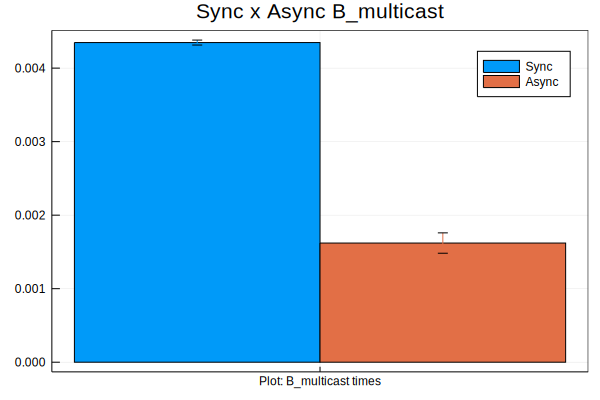

In [17]:
groupedbar(["Plot: B_multicast times"], [mean(sync_times) mean(async_times)], yerr = [z*std(sync_times)/length(sync_times) z*std(async_times)/length(async_times)], label=["Sync", "Async"], title = "Sync x Async B_multicast",framestyle = :box)

* Qual das duas versões teve o menor tempo de execução? Por quê?

**Resposta**: _em itálico_



### Exercício 3: Análise de desempenho do R-multicast (3,0 pontos)

Implemente duas versões do algoritmo R-multicast: uma assíncrona e outra síncrona.

* R-multicast assíncrono

In [ ]:
#TODO implementação do R-multicast síncrono.

* R-multicast assíncrono

In [ ]:
#TODO implementação do R-multicast assíncrono.

Faça a mesma análise de desempenho para o R-multicast que você fez no Exercício 2.


**Gráfico**: _por aqui_    
    
    
* Qual das duas versões (R-multicast assíncrono e assíncrono) teve o menor tempo de execução? Por quê?

**Resposta**: _em itálico_



### Exercício 4: Análise de desempenho: B-multicast vs. R-multicast (3,0 pontos)

Para cada uma das comparações abaixo, qual dos algoritmos teve o menor tempo de execução? Por quê?

* B-multicast assíncrono vs. R-multicast assíncrono.
    

**Resposta**: _em itálico_    
    
* B-multicast síncrono vs. R-multicast síncrono.


**Resposta**: _em itálico_

## Entrega

As respostas deverão ser entregues nos devidos campos desse arquivo, ou seja, em [Markdown](https://en.wikipedia.org/wiki/Markdown) e no formato [IJulia Notebook](https://github.com/JuliaLang/IJulia.jl).

O programa deve ser implementado na linguagem de programação **Julia**. Seu trabalho será testado na [JuliaBox](https://juliabox.com), portanto teste seu arquivo IJulia na JulizBox antes de enviá-lo.


### Forma 

O arquivo IJulia Notebook deverá ser entregue ao Professor **exclusivamente através do Google Classroom**.



A responsabilidade sobre a integridade do arquivo contendo trabalho é exclusivamente dos discentes. Serão ignorados os trabalhos cujos arquivos não conseguirem ser abertos pelo Professor.

### Prazos

O prazo de entrega sem atraso é o dia **18/11/17**.

Trabalhos entregues com atraso serão aceitos, no máximo, até o o dia **19/11/17**. Serão descontados 5% da nota obtida por dia de atraso.


## Pontuação extra

O(a) discente que realizar mais tarefas, além do que foi especificado neste trabalho, o professor atribuirá de 0,5 a 1,0 ponto extra a depender da relevância da contribuição no programa. O critério será decidido pelo professor. 

O(a) discente deve indicar qual é a tarefa executada. Por exemplo, adição de funcionalidades, armazenamento de dados em arquivo, documentação de código, comentários em inglês sem erros ortográficos, etc.


**Plágio** A nota zero será atribuída caso haja qualquer tipo de cópia parcial ou integral assim como as devidas medidas legais. Leia a [cartilha sobre plágio](http://www.noticias.uff.br/arquivos/cartilha-sobre-plagio-academico.pdf).

## Disclaimer

Esse material foi elaborado pelo [Prof. André Lage Freitas](https://sites.google.com/a/ic.ufal.br/andrelage/) e está licenciado sob a licença _GNU General Public License v3.0_.